In [1]:
from datetime import datetime as dt

BBOXES = {
    'central': [29.242740, -0.807347, 29.629208, -0.591585],
    'south':  [29.296298, -1.582263, 29.769293, -1.197520],
}

JOBS = [
    (dt(2020, 1, 1),  dt(2020, 3, 1),  'south', 40),
    (dt(2020, 4, 1),  dt(2020, 6, 1),  'south', 30),
    (dt(2020, 7, 1),  dt(2020, 9, 1),  'south', 15),
    (dt(2020, 10, 1), dt(2020, 12, 1), 'south', 20),
    
    (dt(2021, 1, 1),  dt(2021, 3, 1), 'south',  30),
    (dt(2021, 4, 1),  dt(2021, 6, 1), 'south',  30),
    (dt(2021, 7, 1),  dt(2021, 9, 1), 'south',  15),
    (dt(2021, 10, 1), dt(2021, 12, 1), 'south', 20),
    
    (dt(2022, 1, 1),  dt(2022, 3, 1), 'south',  20),
    (dt(2022, 4, 1),  dt(2022, 6, 1), 'south',  30),
    (dt(2022, 7, 1),  dt(2022, 9, 1), 'south',   5),
    (dt(2022, 10, 1), dt(2022, 12, 1), 'south', 30),
    
    (dt(2020, 1, 1),  dt(2020, 3, 1),  'central', 20),
    (dt(2020, 4, 1),  dt(2020, 6, 1),  'central', 20),
    (dt(2020, 7, 1),  dt(2020, 9, 1),  'central', 20),
    (dt(2020, 10, 1), dt(2020, 12, 1), 'central', 20),

    (dt(2021, 1, 1),  dt(2021, 3, 1), 'central',  20),
    (dt(2021, 4, 1),  dt(2021, 6, 1), 'central',  30),
    (dt(2021, 7, 1),  dt(2021, 9, 1), 'central',  20),
    (dt(2021, 10, 1), dt(2021, 12, 1), 'central', 20),

    (dt(2022, 1, 1),  dt(2022, 3, 1), 'central',  30),
    (dt(2022, 4, 1),  dt(2022, 6, 1), 'central',  20),
    (dt(2022, 7, 1),  dt(2022, 9, 1), 'central',  15),
    (dt(2022, 10, 1), dt(2022, 12, 1), 'central', 30),
]


## Initialize collections 📂

Try to make sure grid square has at least 2-3 images per 

In [3]:
%reload_ext autoreload
%autoreload 2

import os
from pystac import ItemCollection

import common.utilities.download as download


job_params = []
for job in JOBS:
    start_date, end_date, region, max_cloud_cover = job[0], job[1], job[2], job[3]
    bbox = BBOXES[region]

    sub_dir =  start_date.strftime("%Y%m%d") + "_" + end_date.strftime("%Y%m%d") + "_" + region
    print(sub_dir)
    
    collection_path = f'./data/{sub_dir}/s2_collection.json'
    
    if not os.path.exists(collection_path):
        collection = download.get_collection(start_date, end_date, bbox, collection_path, max_cloud_cover=max_cloud_cover, min_tile_count=2)
    else:
        collection = ItemCollection.from_file(collection_path)

    job_params.append({
        'collection': collection,
        'sub_dir': sub_dir,
        'bbox': bbox
    })
    

20200101_20200301_south
20200401_20200601_south
20200701_20200901_south
20201001_20201201_south
20210101_20210301_south
20210401_20210601_south
20210701_20210901_south
20211001_20211201_south
20220101_20220301_south
20220401_20220601_south
20220701_20220901_south
20221001_20221201_south
20200101_20200301_central
20200401_20200601_central
20200701_20200901_central
20201001_20201201_central
20210101_20210301_central
20210401_20210601_central
20210701_20210901_central
20211001_20211201_central
20220101_20220301_central
20220401_20220601_central
20220701_20220901_central
20221001_20221201_central


In [13]:
%reload_ext autoreload
%autoreload 2

import glob
import shutil


import common.utilities.download as download
import common.utilities.imagery as imagery


for params in job_params:
    bbox = params['bbox']
    sub_dir = params['sub_dir']
    collection = params['collection']
    
    print(sub_dir)
    
    job_dir = f'./data/{sub_dir}'
    composite_path = download.get_processed_composite(collection, bbox, job_dir)
    
    rgb_path = f'./data/{sub_dir}/rgb_byte.tif'
    imagery.create_rgb_byte_tif_from_composite(composite_path, rgb_path)
    
    # remove scene directories to save space
    scene_dirs = glob.glob(f'{job_dir}/S2*')
    for sdir in scene_dirs:
        shutil.rmtree(sdir)
    

20200101_20200301_south
20200401_20200601_south
20200701_20200901_south
20201001_20201201_south
20210101_20210301_south
20210401_20210601_south
20210701_20210901_south
20211001_20211201_south
20220101_20220301_south
20220401_20220601_south
20220701_20220901_south
20221001_20221201_south
20200101_20200301_central
20200401_20200601_central
20200701_20200901_central
20201001_20201201_central
20210101_20210301_central
20210401_20210601_central
20210701_20210901_central
20211001_20211201_central
20220101_20220301_central
20220401_20220601_central
20220701_20220901_central
20221001_20221201_central


In [5]:
%%bash

# gdalinfo ./data/20200101_20200301_south/S2A_35MQU_20200212_0_L2A/stack.tif
gdalinfo -stats ./data/20221001_20221201_central/composite.tif

Driver: GTiff/GeoTIFF
Files: ./data/20221001_20221201_central/composite.tif
Size is 4302, 2402
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (29.242740000000001,-0.591585000000000)
Pixel Size = (0.000089834495583,-0.000089825978351)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=PIXEL
Corner Coordinates:
Upper Left  (  29.2427400,  -0.5915850) ( 29d14'33.86"E,  0d35'29.71"S)
Lower Left  (  29.2427400,  -0.8073470) ( 29d14'33.86"E,  0d48'26.45"S)
U

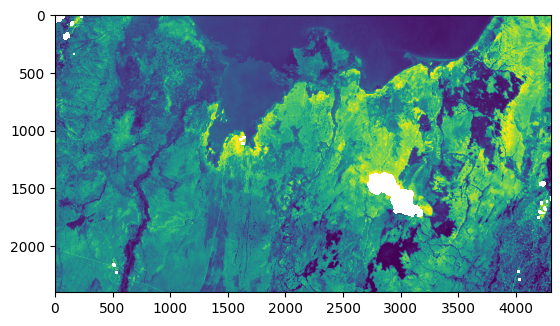

In [8]:
import matplotlib.pyplot as plt
import rasterio

with rasterio.open("./data/20220701_20220901_central/composite.tif") as src:
    data = src.read(3, masked=True)
    plt.imshow(data)

(4, 4283, 5265)


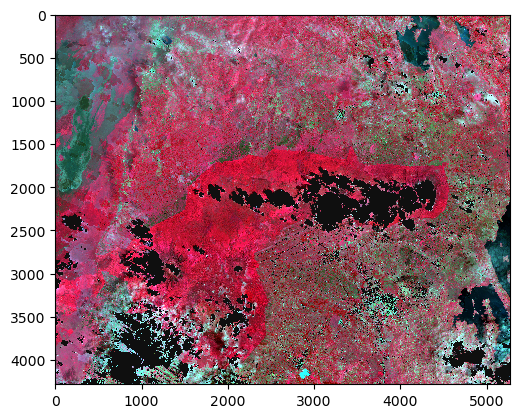

In [13]:
import rasterio

import common.utilities.visualization as viz

tif_path = "./data/20200101_20200301_south/composite.tif"
with rasterio.open(tif_path) as src:
    data = src.read(masked=True)
    
viz.plot_bands(data, bands=[3, 2, 1], transpose=True)